In [40]:
import pandas as pd
import numpy as np

# Data Preprocessing and Visualization

In [41]:
data = pd.read_csv("project2.data")
data_original = pd.read_csv("project2-original.data")

In [42]:
# Raw data
data

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [43]:
# Identify shape, size of the raw data
print("Size: ", data.size)
print("Shape: ", data.shape)

Size:  2860
Shape:  (286, 10)


In [44]:
# Get information about datatypes. Comment if any of the variables need datatype conversion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


## Data Preprocessing
The data sets consists of 10 categories. 9 are of the data type "object" and one is of type int. All the object typed columns will need to be converted to other data types. Looking at the data, the "node-caps" and "irradiat" seem to be pure yes/no booleans, whereas "class", "menopause", "breast", and "breast-quad" seem to be categorical variables with no clear heirarchy. The other variables, "age", "tumor-size", "inv-node", and "deg-malig" are given as catergorical variables, however represent numerical values and hold certain heirarchical meaning in their quantitative values. This is somewhat troublesome however as the age, tumor size, and inv-node are all given as ranges such as "30-39" for age, rather than an exact age. Having an integer value for age rather than a range would make this type conversion much easier. This will be further investigated. 

In [45]:
data.duplicated().sum() # there are 14 duplicated entries


14

In [46]:
data.drop_duplicates(inplace=True, ignore_index=True)

In [47]:
data.duplicated().sum() # no more duplicated values!

0

In [48]:
# Data analysis, Preprocessing 
# Class attribute
print("Unique values: ", data["class"].unique())
print("total # of null values", data["class"].isnull().sum())
print("\nSummary of Class attribute:")
data["class"].describe()


Unique values:  ['no-recurrence-events' 'recurrence-events']
total # of null values 0

Summary of Class attribute:


count                      272
unique                       2
top       no-recurrence-events
freq                       191
Name: class, dtype: object

In [49]:
# Age attribute
print("Unique values: ", data["age"].unique())
print("total # of null values", data["age"].isnull().sum())
print("\nSummary of Age attribute:")
data["age"].describe()

Unique values:  ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
total # of null values 0

Summary of Age attribute:


count       272
unique        6
top       50-59
freq         91
Name: age, dtype: object

In [50]:
# Menopause attribute:
print("Unique values: ", data["menopause"].unique())
print("total # of null values", data["menopause"].isnull().sum())
print("\nSummary of Menopause attribute:")
data["menopause"].describe()


Unique values:  ['premeno' 'ge40' 'lt40']
total # of null values 0

Summary of Menopause attribute:


count         272
unique          3
top       premeno
freq          143
Name: menopause, dtype: object

In [51]:
# tumor-size attributes
print("Unique values: ", data["tumor-size"].unique())
print("total # of null values", data["tumor-size"].isnull().sum())
print("\nSummary of tumor-size attribute:")
data["tumor-size"].describe()


Unique values:  ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
total # of null values 0

Summary of tumor-size attribute:


count       272
unique       11
top       30-34
freq         60
Name: tumor-size, dtype: object

In [52]:
# Inv-nodes attribute
print("Unique values: ", data["inv-nodes"].unique())
print("total # of null values", data["inv-nodes"].isnull().sum())
print("\nSummary of Inv-nodes attribute:")
data["inv-nodes"].describe()

Unique values:  ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
total # of null values 0

Summary of Inv-nodes attribute:


count     272
unique      7
top       0-2
freq      200
Name: inv-nodes, dtype: object

In [53]:
# node-caps attribute
print("Unique values: ", data["node-caps"].unique())
print("total # of null values", data["node-caps"].isnull().sum())

## This is tricky because there are no "null" values, but there are missing values as "?"

print("Total missing values: ", len(data[data['node-caps'] == '?']))
print("Missing values here:")
data[data['node-caps'] == '?']

print("\nSummary of node-caps attribute:")
data["node-caps"].describe()

# Will need to circle back to this, do i just need to delete the rows? 

Unique values:  ['no' 'yes' '?']
total # of null values 0
Total missing values:  8
Missing values here:

Summary of node-caps attribute:


count     272
unique      3
top        no
freq      209
Name: node-caps, dtype: object

In [54]:
# deg-malig attribute 
print("Unique values: ", data["deg-malig"].unique())
print("total # of null values", data["deg-malig"].isnull().sum())

print("\nSummary of deg-malig attribute:")
data["deg-malig"].describe()


Unique values:  [3 2 1]
total # of null values 0

Summary of deg-malig attribute:


count    272.000000
mean       2.058824
std        0.736649
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: deg-malig, dtype: float64

In [55]:
# breast attribute 
print("Unique values: ", data["breast"].unique())
print("total # of null values", data["breast"].isnull().sum())

print("\nSummary of breast attribute:")
data["breast"].describe()

Unique values:  ['left' 'right']
total # of null values 0

Summary of breast attribute:


count      272
unique       2
top       left
freq       143
Name: breast, dtype: object

In [56]:
# breast-quad attribute 
print("Unique values: ", data["breast-quad"].unique())
print("total # of null values", data["breast-quad"].isnull().sum())

## more missing values
print("Total missing values: ", len(data[data['breast-quad'] == '?']))
print("Missing values here:")
data[data['breast-quad'] == '?']

## will circle back, only missing one value

print("\nSummary of breast-quad attribute:")
data["breast-quad"].describe()


Unique values:  ['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']
total # of null values 0
Total missing values:  1
Missing values here:

Summary of breast-quad attribute:


count          272
unique           6
top       left_low
freq           103
Name: breast-quad, dtype: object

In [57]:
# irradiat attribute 
print("Unique values: ", data["irradiat"].unique())
print("total # of null values", data["irradiat"].isnull().sum())

print("\nSummary of irradiat attribute:")
data["irradiat"].describe()

Unique values:  ['no' 'yes']
total # of null values 0

Summary of irradiat attribute:


count     272
unique      2
top        no
freq      205
Name: irradiat, dtype: object

## Data Visualization

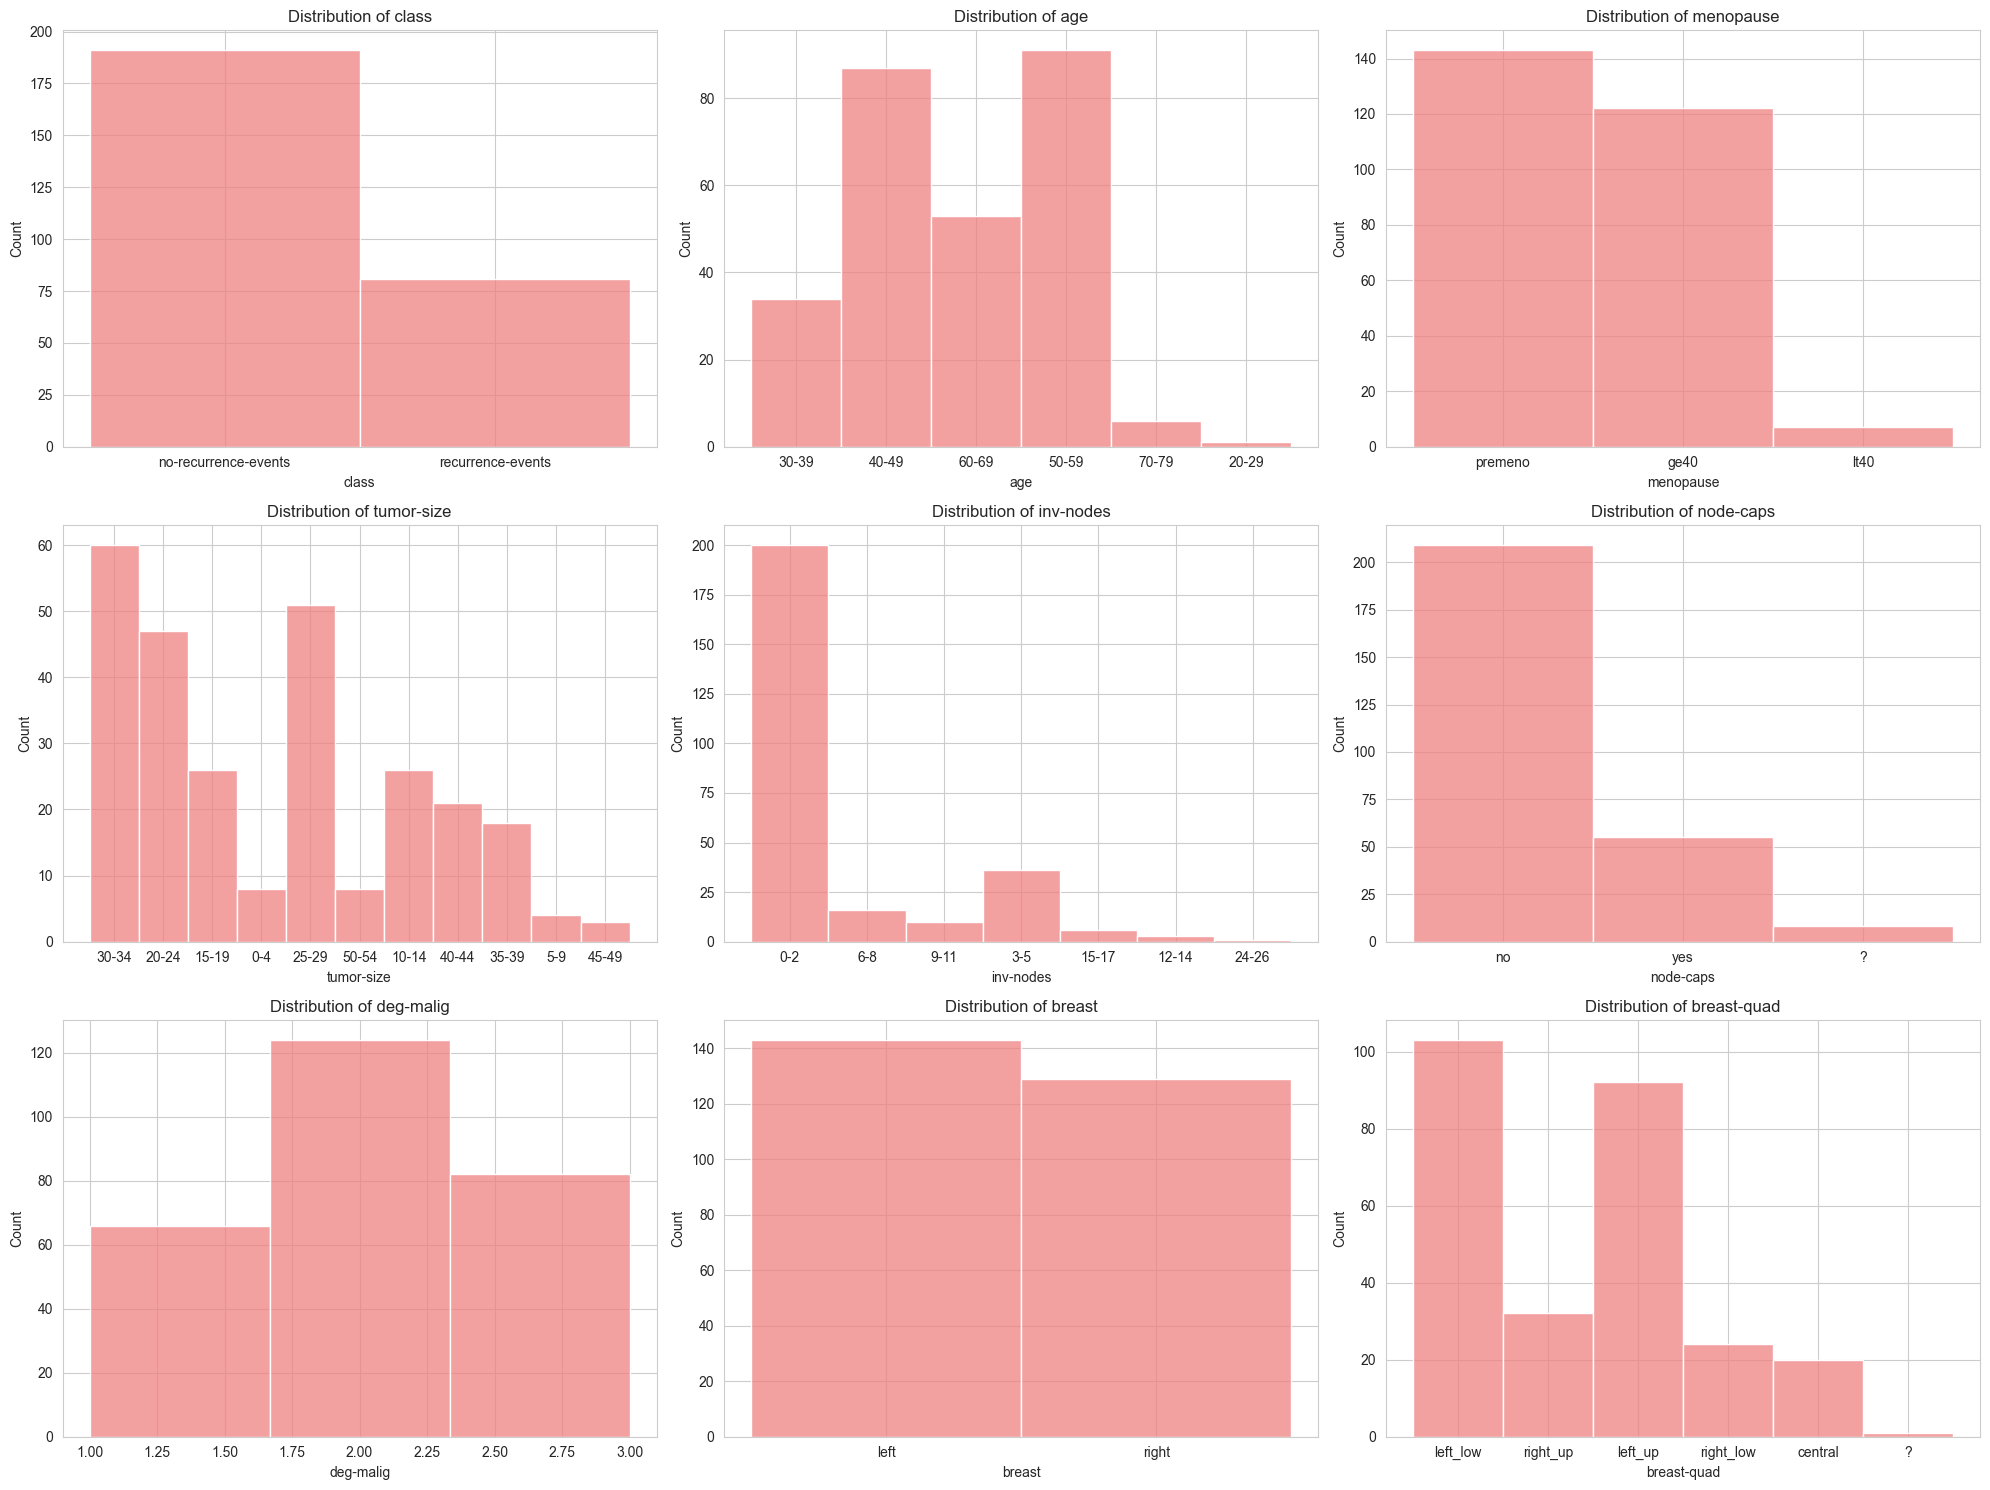

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the plot color
plot_color = 'lightcoral'

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Adjusting the subplot layout to accommodate the updated number of variables
fig, ax = plt.subplots(3, 3, figsize=(20, 15))  # Adjusted to 4x3 to fit the additional plot


categorical_columns = ['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad']
for i, column in enumerate(categorical_columns, start=0):  # Start from the third plot
    sns.histplot(data[column], bins=3, ax=ax[i//3, i%3], kde=False, color=plot_color, orientation='vertical')
    ax[i//3, i%3].set_title(f'Distribution of {column}')


plt.tight_layout()
plt.show()

## Proccessing data
So far the data looks promising, the only issues are the missing values in the 'node-caps' (8) and 'breast-quad' (1) attributes. To solve this there are 2 straight forward solutions: delete the rows or fill the missing values with the mode (most popular value) of their respective columns. As the dataset consists of only 286 entries, I chose to go with filling the values rather than deleting the row as to not lose valuable data. 

Further, the "class", "menopause", "node-caps", "breast", "breast-quad" and "irradiat" variables will be one hot encoded as they are purely categorical, or nominal variables. 

The "age", "tumor-size", and "inv-nodes" variables are all ordinal variables that contain an inherent heirarchy or ranking in their values. These variables are also given as ranges rather than specific values. One-hot encoding would destroy the relationship/ranking of these variables, so we have two options: Ordinal encoding or using the mean of the range as the value, allowing us to interpret the varaibles as a contintinous variable. 

1) First, I will fill the missing values. 

2) Second, I will preform ordinal encoding on the ordinal variables.

3) Lastly one hot encoding will be preformed on the nominal variables.


### Filling Missing Values

In [59]:
# node-caps
print('The mode of the node-caps column is: ', data['node-caps'].mode()[0])

# replacing the ? with the mode
data['node-caps'] = data['node-caps'].replace('?', data['node-caps'].mode()[0])

# Confirming it worked
data['node-caps'].unique()
print('Missing values in node-caps attribute: ', len(data[data['node-caps'] == '?']))

The mode of the node-caps column is:  no
Missing values in node-caps attribute:  0


In [60]:
# breast-quad
print('The mode of the breast-quad column is: ', data['breast-quad'].mode()[0])

# replacing the ? with the mode
data['breast-quad'] = data['breast-quad'].replace('?', data['breast-quad'].mode()[0])

# Confirming it worked
data['breast-quad'].unique()
print('Missing values in breast-quad attribute: ', len(data[data['breast-quad'] == '?']))

The mode of the breast-quad column is:  left_low
Missing values in breast-quad attribute:  0


In [61]:
# Verifying
print('Question Mark Values:')
print(data.map(lambda x: x == '?').sum())

print('\nNull or NaN Values:')
data.isnull().sum()

Question Mark Values:
class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

Null or NaN Values:


class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

### Ordinal encoding

In [62]:
# Age
scale_mapper_age = { "20-29":0, "30-39":1, "40-49":2, "50-59":3,"60-69":4, "70-79":5 }
data["age"] = data["age"].replace(scale_mapper_age)

/var/folders/hm/klr8rtx572v84mlfrf6m6vp80000gn/T/ipykernel_67383/3346021011.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["age"] = data["age"].replace(scale_mapper_age)


In [63]:
# tumor size
scale_mapper_tumor_size = {"0-4":0, "5-9":1,
                           "10-14":2,"15-19":3,
                           "20-24":4, "25-29":5,
                           "30-34":6,"35-39":7,
                           "40-44":8, "45-49":9,
                           "50-54":10}

data['tumor-size'] = data['tumor-size'].replace(scale_mapper_tumor_size)


/var/folders/hm/klr8rtx572v84mlfrf6m6vp80000gn/T/ipykernel_67383/828504478.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['tumor-size'] = data['tumor-size'].replace(scale_mapper_tumor_size)


In [64]:
# inv-nodes
scale_mapper_inv_nodes = { "0-2":0, "3-5":1, "6-8":2, "9-11":3,"12-14":4, "15-17":5, "24-26":6 }

data["inv-nodes"] = data["inv-nodes"].replace(scale_mapper_inv_nodes)

/var/folders/hm/klr8rtx572v84mlfrf6m6vp80000gn/T/ipykernel_67383/742387722.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["inv-nodes"] = data["inv-nodes"].replace(scale_mapper_inv_nodes)


In [65]:
data

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,1,premeno,6,0,no,3,left,left_low,no
1,no-recurrence-events,2,premeno,4,0,no,2,right,right_up,no
2,no-recurrence-events,2,premeno,4,0,no,2,left,left_low,no
3,no-recurrence-events,4,ge40,3,0,no,2,right,left_up,no
4,no-recurrence-events,2,premeno,0,0,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
267,recurrence-events,1,premeno,6,0,no,2,left,left_up,no
268,recurrence-events,1,premeno,4,0,no,3,left,left_up,yes
269,recurrence-events,4,ge40,4,0,no,1,right,left_up,no
270,recurrence-events,2,ge40,6,1,no,3,left,left_low,no


### One Hot Encoding

In [66]:
data = pd.get_dummies(data, columns=["class", "menopause", "node-caps", "breast", "breast-quad", "irradiat"], drop_first=True)

In [67]:
data

,age,tumor-size,inv-nodes,deg-malig,class_recurrence-events,menopause_lt40,menopause_premeno,node-caps_yes,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes
0,1,6,0,3,False,False,True,False,False,True,False,False,False,False
1,2,4,0,2,False,False,True,False,True,False,False,False,True,False
2,2,4,0,2,False,False,True,False,False,True,False,False,False,False
3,4,3,0,2,False,False,False,False,True,False,True,False,False,False
4,2,0,0,2,False,False,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1,6,0,2,True,False,True,False,False,False,True,False,False,False
268,1,4,0,3,True,False,True,False,False,False,True,False,False,True
269,4,4,0,1,True,False,False,False,True,False,True,False,False,False
270,2,6,1,3,True,False,False,False,False,True,False,False,False,False


## Part 2

### Splitting Data

In [68]:
from sklearn.model_selection import train_test_split

X = data.drop('class_recurrence-events', axis=1)
y = data['class_recurrence-events']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


### Random Forest Classifier

In [76]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(random_state=1)

param_grid = {
   "n_estimators": np.arange(10, 100, 2),
   "max_depth": [None] + list(np.arange(2, 10)),
   "min_samples_leaf": np.arange(1, 10, 2),
   "class_weight": [{0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8}, {0: 0.3, 1: 0.7}], # data is fairly even (191-80) don't need
}

gscv = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='recall')
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'class_weight': [{0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8},
                                          {0: 0.3, 1: 0.7}],
                         'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'n_estimators': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
       78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])},
             scoring='recall')

In [77]:
## Above took 3.5 minutes
print("Best parameters:", gscv.best_params_)
print("Best score:", gscv.best_score_)

rf_model = gscv.best_estimator_

from sklearn.metrics import classification_report

print(f"Performance on TEST\n*******************\n{classification_report(y_test, rf_model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, rf_model.predict(X_train))}")


Best parameters: {'class_weight': {0: 0.1, 1: 0.9}, 'max_depth': 2, 'min_samples_leaf': 1, 'n_estimators': 10}
Best score: 1.0
Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        58
        True       0.29      1.00      0.45        24

    accuracy                           0.29        82
   macro avg       0.15      0.50      0.23        82
weighted avg       0.09      0.29      0.13        82

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       1.00      0.01      0.01       133
        True       0.30      1.00      0.46        57

    accuracy                           0.31       190
   macro avg       0.65      0.50      0.24       190
weighted avg       0.79      0.31      0.15       190



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### K Nearest Neighbor

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid for KNN
param_grid = {
    'n_neighbors': range(1, 100),
    'weights': ['uniform', 'distance'], 
    'algorithm': ['auto','ball_tree','kd_tree','brute'] 
}

knn = KNeighborsClassifier()

knn_gscv = GridSearchCV(knn, param_grid, cv=5, scoring='recall')
knn_gscv.fit(X_train, y_train)
print("Best parameters for KNN:", knn_gscv.best_params_)
knn_model = knn_gscv.best_estimator_

Best parameters for KNN: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'uniform'}


In [83]:
print("Best parameters:", knn_gscv.best_params_)
print("Best score:", knn_gscv.best_score_)

print("KNN Classification Report:")
print(f"Performance on TEST\n*******************\n{classification_report(y_test, knn_model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, knn_model.predict(X_train))}")


Best parameters: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'uniform'}
Best score: 0.29393939393939394
KNN Classification Report:
Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.78      0.88      0.83        58
        True       0.59      0.42      0.49        24

    accuracy                           0.74        82
   macro avg       0.69      0.65      0.66        82
weighted avg       0.73      0.74      0.73        82

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.79      0.95      0.86       133
        True       0.79      0.40      0.53        57

    accuracy                           0.79       190
   macro avg       0.79      0.68      0.70       190
weighted avg       0.79      0.79      0.77       190



### Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

# Setting up the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': np.arange(100, 10000, 50)
}

# Initialize Logistic Regression
lr_model = LogisticRegression()

# Setup GridSearchCV
lr_gscv = GridSearchCV(lr_model, param_grid, cv=5, scoring='recall', verbose=1)

# Fit the model
lr_gscv.fit(X_train, y_train)

lr_model = lr_gscv.best_estimator_


Fitting 5 folds for each of 1980 candidates, totalling 9900 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [74]:
print("Logistic Regression Classification Report:")
print(f"Performance on TEST\n*******************\n{classification_report(y_test, lr_model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, lr_model.predict(X_train))}")

Logistic Regression Classification Report:
Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.77      0.86      0.81        58
        True       0.53      0.38      0.44        24

    accuracy                           0.72        82
   macro avg       0.65      0.62      0.63        82
weighted avg       0.70      0.72      0.70        82

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.74      0.93      0.82       133
        True       0.59      0.23      0.33        57

    accuracy                           0.72       190
   macro avg       0.66      0.58      0.58       190
weighted avg       0.69      0.72      0.68       190



In [75]:
## Add bonus here if have time